In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = open('../data/filtered_significant.diff', 'rU').read()
dataa = np.array([i.split('\t') for i in data.split('\n')[:-1]])
datal = [i.split('\t') for i in data.split('\n')[:-1]][:-1]

In [3]:
dataa2 = dataa[:,[2,8,11]]
datal2 = [j.split(',') for j in [i[2] + ',' + i[8] + ',' + i[11] for i in datal ] ]

In [14]:
# qvals = map(dataa2[:,[2]][1:], float)
# logqneg = np.log(qvals)*(-1)
# fc = dataa2[:,[1]]
# genes = dataa2[:, [0]][1:]

qvals = map(float, [ i[-1] for i in datal2][1:])
logqneg = np.log(qvals)*(-1)
fc = [i[1] for i in datal2[1:]]
genes = [i[0] for i in datal2[1:]]
ind = np.arange(0,len(fc), 1)

Goal: I want to create a plot that shows both q-value and fold change in one plot for the same genes.   
I will use a diagram with two y axes, following this guideline: 
http://matplotlib.org/examples/api/two_scales.html

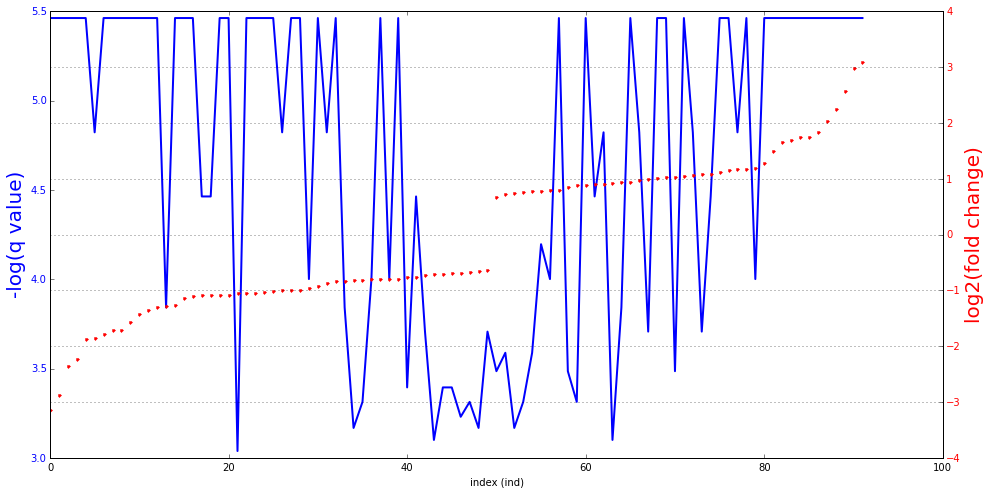

In [45]:
#fig, ax1 = plt.subplots()

fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot(111)

ax1.plot(ind, logqneg , 'b-', linewidth=2)
ax1.set_xlabel('index (ind)')
ax1.set_ylabel('-log(q value)', color='b', fontsize=20)
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(ind, fc, 'r.', linewidth=2)
ax2.set_ylabel('log2(fold change)', color='r', fontsize=20)
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.grid(True)
plt.savefig('foldchange_qval.pdf')    

#plt.show()